In [22]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

# Substitua 'caminho/para/seu/arquivo.csv' pelo caminho real do seu arquivo CSV
df = pd.read_csv('.\Input\Ecommerce_DBS.csv')


<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ti_ag\AppData\Local\Temp\ipykernel_376\3735726844.py:2: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('.\Input\Ecommerce_DBS.csv')


In [24]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y')
df['Year'] = df['Purchase Date'].dt.year

In [25]:
# Definindo a data de 3 anos atrás
# Obtendo a maior data na coluna 'Purchase Date'
max_date = df['Purchase Date'].max()

three_years_ago = max_date - timedelta(days=3*365)
print(str(max_date) + " " + str(three_years_ago))

# Filtrando o DataFrame para incluir apenas as linhas dos últimos 3 anos
df_recent = df[df['Purchase Date'] > three_years_ago]

# Agrupando por 'Product Category' e somando 'Total Purchase Amount'
df['Total Purchase Amount'] = df['Total Purchase Amount'].astype(float)
sales_by_category = df_recent.groupby('Product Category')['Total Purchase Amount'].sum()

# Obtendo a categoria de produto com as maiores vendas
top_category = sales_by_category.idxmax()
print('A categoria de produto com as maiores vendas nos últimos 3 anos foi: ' + top_category)

2023-09-15 00:00:00 2020-09-15 00:00:00
A categoria de produto com as maiores vendas nos últimos 3 anos foi: Clothing


In [26]:
#Devido a falta de uma coluna especifica para produtos, foi utilizada a coluna Total de Compra dividido pela quantidade para encontrar o maior e o menor valor.

# Criando uma nova coluna com 'Total Purchase Amount' dividido por 'Quantity'
df['Amount per Quantity'] = df['Total Purchase Amount'] / df['Quantity']

# Encontrando a linha com o menor valor
min_value_row = df.loc[df['Amount per Quantity'].idxmin()]

# Encontrando a linha com o maior valor
max_value_row = df.loc[df['Amount per Quantity'].idxmax()]

print("Linha com menor valor:\n", min_value_row)
print("\nLinha com maior valor:\n", max_value_row)

Linha com menor valor:
 Customer ID                            34110
Purchase Date            2020-08-06 00:00:00
Product Category                 Electronics
Product Price                            324
Quantity                                   5
Total Purchase Amount                  100.0
NPS                                        0
Customer Age                              18
Gender                                Female
Source                     Instagram Campign
Country                               Canada
State                                Ontario
Latitude                                50.0
Longituide                             -85.0
Year                                    2020
Amount per Quantity                     20.0
Name: 138255, dtype: object

Linha com maior valor:
 Customer ID                                  33827
Purchase Date                  2023-01-02 00:00:00
Product Category                       Electronics
Product Price                                  144

In [27]:
# Agrupando por 'Product Category' e somando 'Quantity'
quantity_by_category = df.groupby('Product Category')['Quantity'].sum()

# Encontrando a categoria mais vendida
most_sold_category = quantity_by_category.idxmax()

# Encontrando a categoria menos vendida
least_sold_category = quantity_by_category.idxmin()

print("Categoria mais vendida:", most_sold_category)
print("Categoria menos vendida:", least_sold_category)

Categoria mais vendida: Clothing
Categoria menos vendida: Home


In [28]:
# Encontrando a categoria com o produto mais caro
most_expensive_category = df.loc[df['Amount per Quantity'].idxmax()]['Product Category']

# Encontrando a categoria com o produto mais barato
cheapest_category = df.loc[df['Amount per Quantity'].idxmin()]['Product Category']

print("Categoria com o produto mais caro:", most_expensive_category)
print("Categoria com o produto mais barato:", cheapest_category)

Categoria com o produto mais caro: Electronics
Categoria com o produto mais barato: Electronics


In [29]:
#Aqui foi feita a análise considerando o maior e o menor valor de NPS geral.

# Encontrando a categoria com o maior NPS
highest_nps_category = df.loc[df['NPS'].idxmax()]['Product Category']

# Encontrando a categoria com o menor NPS
lowest_nps_category = df.loc[df['NPS'].idxmin()]['Product Category']

print("Categoria com o maior NPS:", highest_nps_category)
print("Categoria com o menor NPS:", lowest_nps_category)

Categoria com o maior NPS: Home
Categoria com o menor NPS: Clothing


In [30]:
#Para está análise, foi utilizada a média de NPS por categoria.

# Agrupando por 'Product Category' e calculando a média de 'NPS'
average_nps_by_category = df.groupby('Product Category')['NPS'].mean()

# Encontrando a categoria com a maior média de NPS
highest_nps_category = average_nps_by_category.idxmax()

# Encontrando a categoria com a menor média de NPS
lowest_nps_category = average_nps_by_category.idxmin()

print("Categoria com a maior média de NPS:", highest_nps_category)
print("Categoria com a menor média de NPS:", lowest_nps_category)

Categoria com a maior média de NPS: Home
Categoria com a menor média de NPS: Electronics


In [31]:
# Agrupando por 'Product Category' e somando 'Quantity'
df_quantity_by_category_gender = df.groupby(['Product Category','Gender'])['Quantity'].sum()
df_quantity_by_gender_source = df.groupby(['Gender','Source'])['Quantity'].sum().reset_index()

In [32]:
# Renomeando a coluna 'Customer Age' para 'Customer_Age'
df = df.rename(columns={'Customer Age ': 'Customer Age'})
# Convertendo a coluna 'Customer Age' para inteiro
df['Customer Age'] = df['Customer Age'].astype(int)

# Definindo os limites dos intervalos
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Criando os intervalos
df['Age Range'] = pd.cut(df['Customer Age'], bins)


In [33]:
df_quantity_by_category_age = df.groupby(['Product Category','Age Range'])['Quantity'].sum().reset_index()
df_quantity_by_category_source = df.groupby(['Product Category','Source'])['Quantity'].sum().reset_index()
df_quantity_by_source_year = df.groupby(['Source', 'Year'])['Quantity'].sum().reset_index()
df_quantity_by_year_age = df.groupby(['Year','Age Range'])['Quantity'].sum().reset_index()
df_quantity_by_year_gender = df.groupby(['Year','Gender'])['Quantity'].sum().reset_index()


C:\Users\ti_ag\AppData\Local\Temp\ipykernel_376\1736245888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_quantity_by_category_age = df.groupby(['Product Category','Age Range'])['Quantity'].sum().reset_index()
C:\Users\ti_ag\AppData\Local\Temp\ipykernel_376\1736245888.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_quantity_by_year_age = df.groupby(['Year','Age Range'])['Quantity'].sum().reset_index()


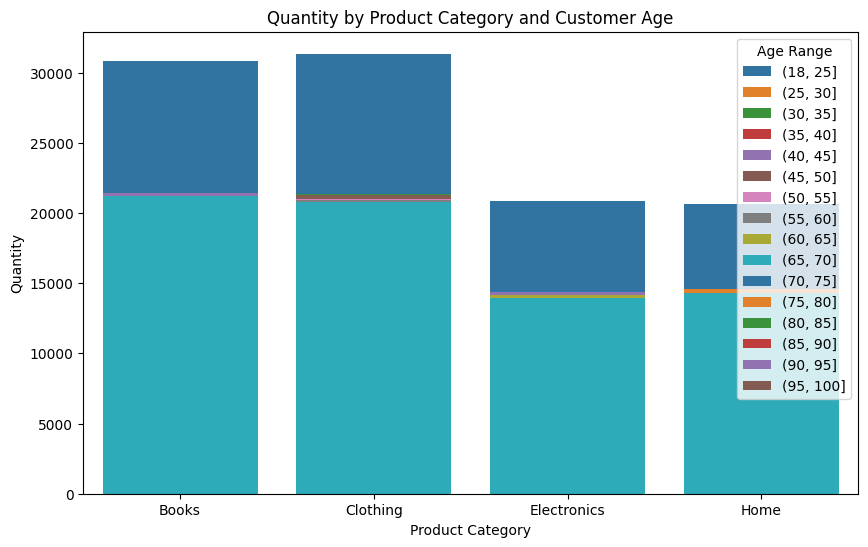

In [34]:


# Definindo a lista de idades únicas
ages = df_quantity_by_category_age['Age Range'].unique()

plt.figure(figsize=(10,6))

# Criando um gráfico de barras para cada idade
for age in ages:
    subset = df_quantity_by_category_age[df_quantity_by_category_age['Age Range'] == age]
    sns.barplot(x='Product Category', y='Quantity', data=subset, label=age)

# Adicionando títulos e rótulos
plt.title('Quantity by Product Category and Customer Age')
plt.xlabel('Product Category')
plt.ylabel('Quantity')

# Adicionando uma legenda
plt.legend(title='Age Range')

# Mostrando o gráfico
plt.show()

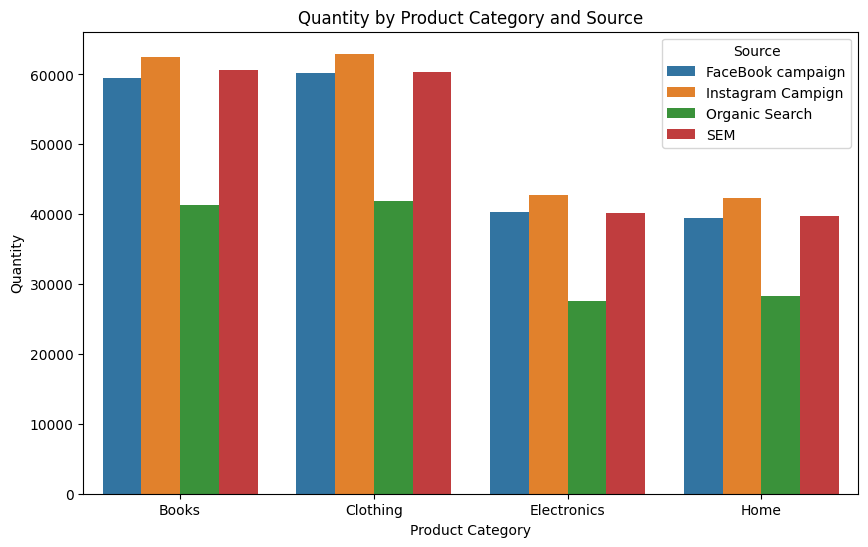

In [35]:
# Criando um gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category', y='Quantity', hue='Source', data=df_quantity_by_category_source)

# Adicionando títulos e rótulos
plt.title('Quantity by Product Category and Source')
plt.xlabel('Product Category')
plt.ylabel('Quantity')

# Mostrando o gráfico
plt.show()

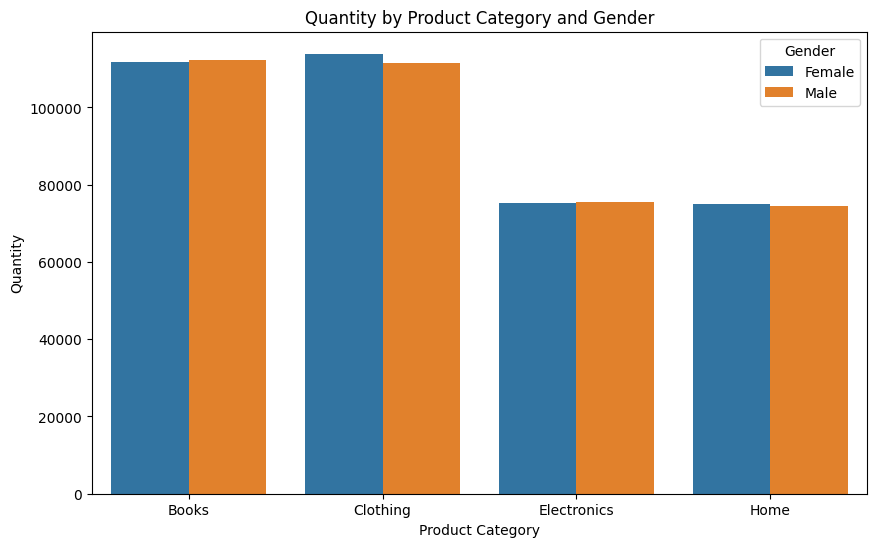

In [36]:
df_quantity_by_category_gender = pd.DataFrame(df_quantity_by_category_gender)
# Criando um gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category', y='Quantity', hue='Gender', data=df_quantity_by_category_gender)

# Adicionando títulos e rótulos
plt.title('Quantity by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Quantity')

# Mostrando o gráfico
plt.show()

C:\Users\ti_ag\AppData\Local\Temp\ipykernel_376\4167951696.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Source', y='Quantity', hue='Gender', data=df_quantity_by_gender_source, ci=None)


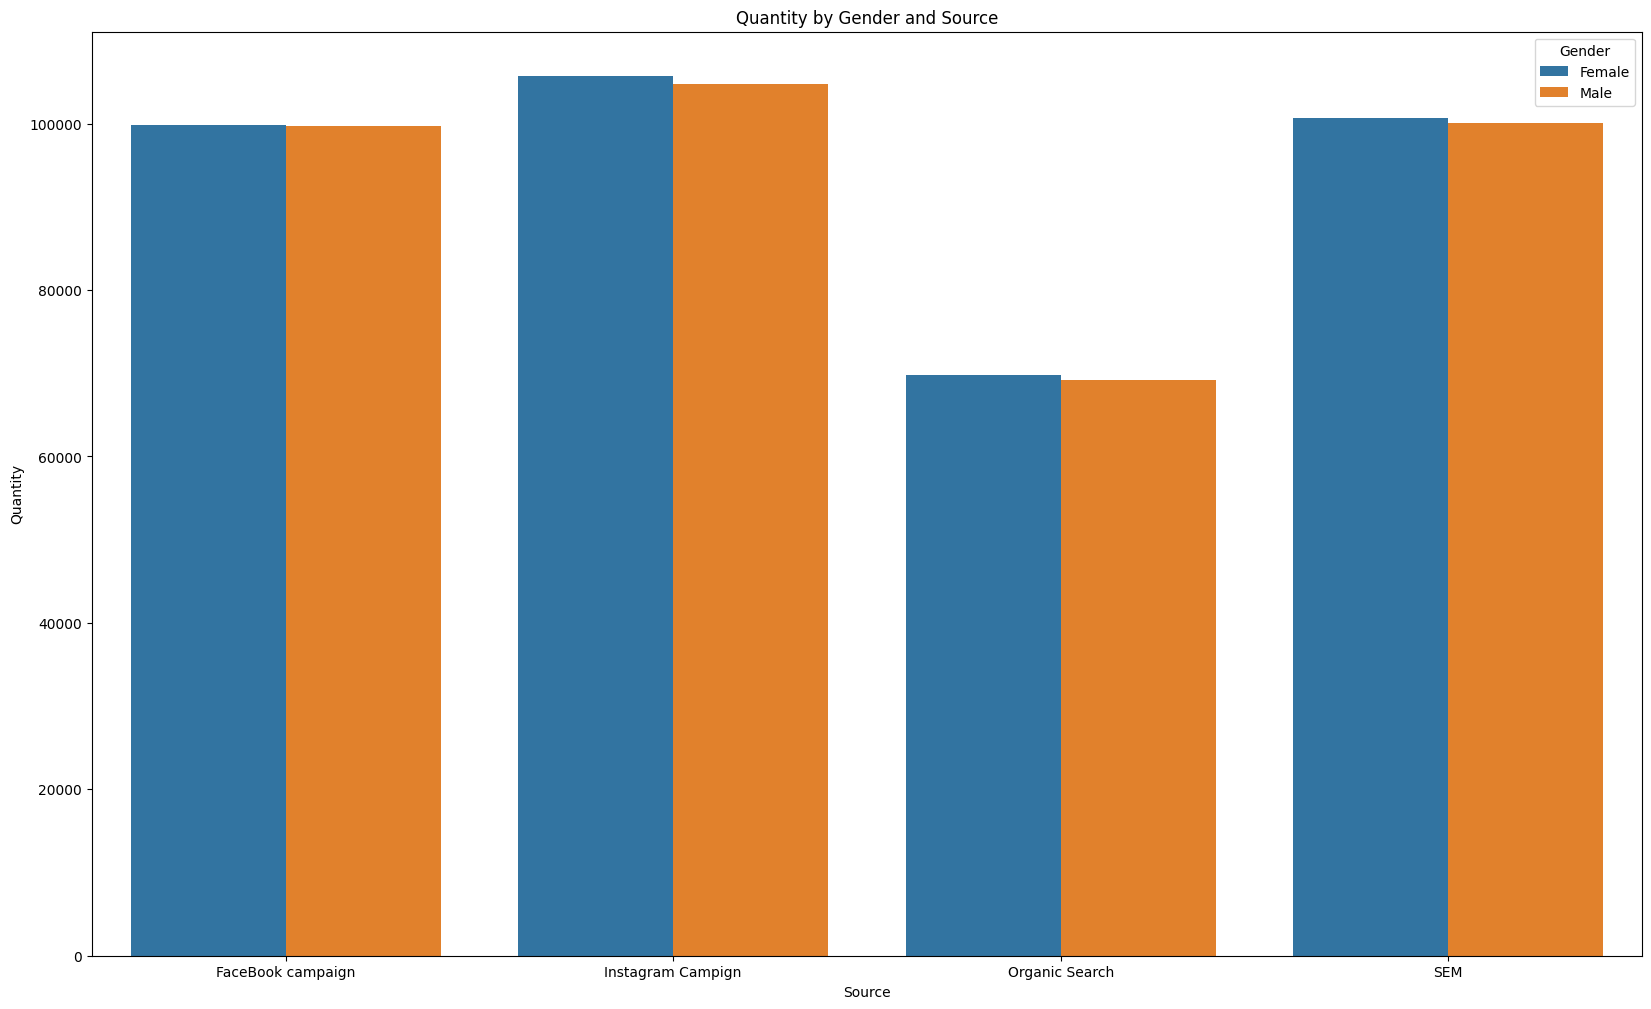

In [37]:
# Criando um gráfico de barras
plt.figure(figsize=(20,12))
sns.barplot(x='Source', y='Quantity', hue='Gender', data=df_quantity_by_gender_source, ci=None)

# Adicionando títulos e rótulos
plt.title('Quantity by Gender and Source')
plt.xlabel('Source')
plt.ylabel('Quantity')

# Mostrando o gráfico
plt.show()

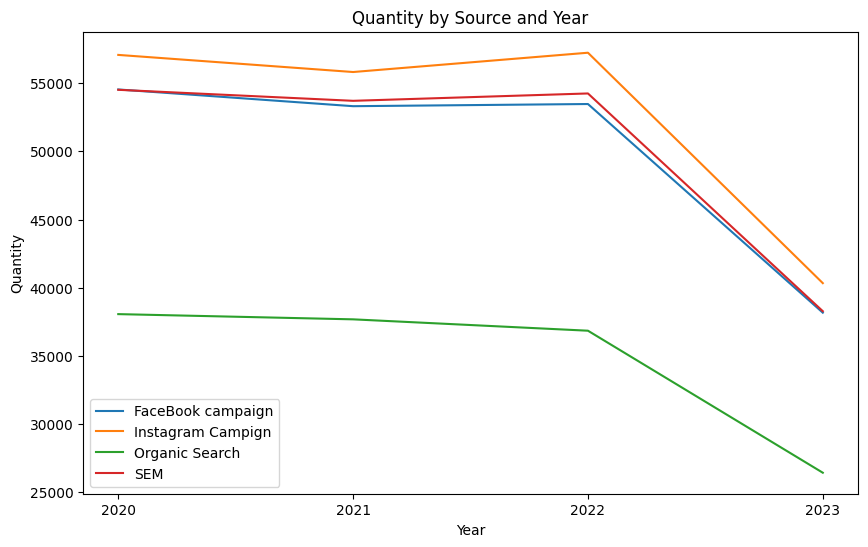

In [38]:
# Criando um gráfico de linhas
plt.figure(figsize=(10,6))
for source in df_quantity_by_source_year['Source'].unique():
    subset_source = df_quantity_by_source_year[df_quantity_by_source_year['Source'] == source]
    plt.plot(subset_source['Year'], subset_source['Quantity'], label=source)

# Adicionando títulos e rótulos
plt.title('Quantity by Source and Year')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Definindo os rótulos do eixo x para serem os valores únicos de 'Year'
plt.xticks(df_quantity_by_source_year['Year'].unique())

# Adicionando uma legenda
plt.legend()

# Mostrando o gráfico
plt.show()

In [39]:
# limpando os valores nulos
df_quantity_by_year_age = df_quantity_by_year_age.dropna()

# Convertendo 'Year' para int
df_quantity_by_year_age['Year'] = df_quantity_by_year_age['Year'].astype(int)

# Ordenando o DataFrame por 'Year'
df_quantity_by_year_age = df_quantity_by_year_age.sort_values('Year')


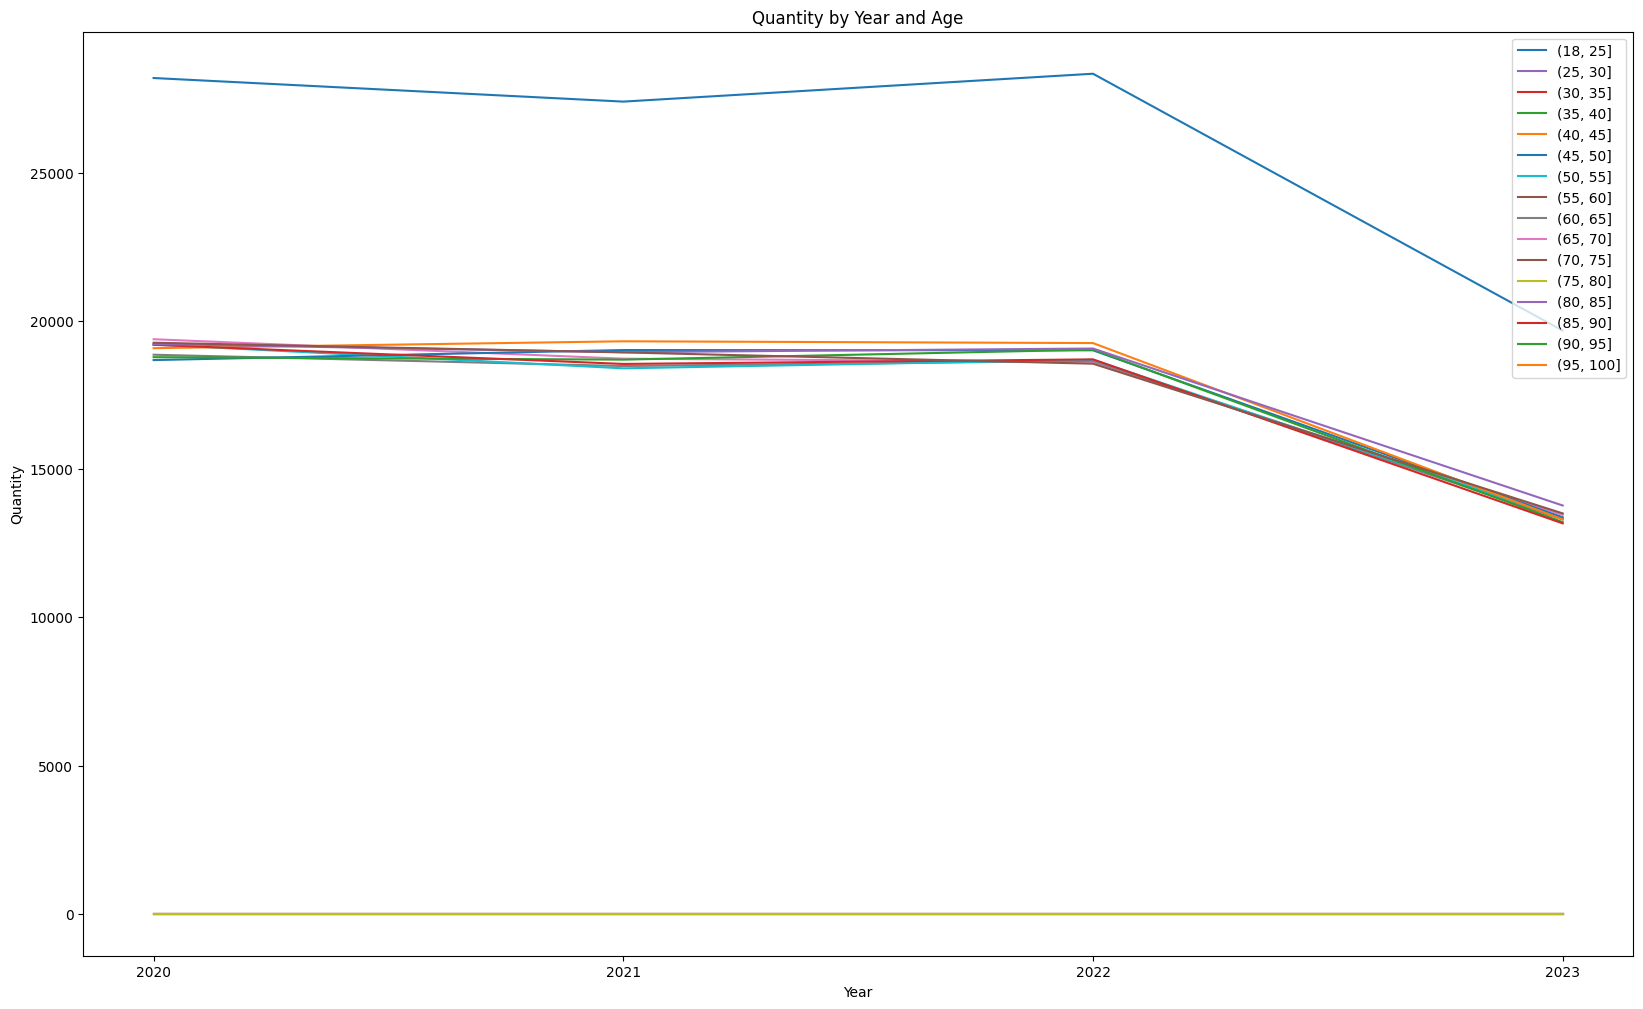

In [40]:
# Criando um gráfico de linhas
plt.figure(figsize=(20,12))
for age in df_quantity_by_year_age['Age Range'].unique():
    subset_age = df_quantity_by_year_age[df_quantity_by_year_age['Age Range'] == age]
    plt.plot(subset_age['Year'], subset_age['Quantity'], label=age)

# Adicionando títulos e rótulos
plt.title('Quantity by Year and Age')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Definindo os rótulos do eixo x para serem os valores únicos de 'Year'
plt.xticks(df_quantity_by_year_age['Year'].unique())

# Coletando as linhas e rótulos do gráfico
lines, labels = plt.gca().get_legend_handles_labels()

# Ordenando os rótulos
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[0]))

# Definindo a legenda com os rótulos ordenados
plt.legend(lines, labels)

# Mostrando o gráfico
plt.show()

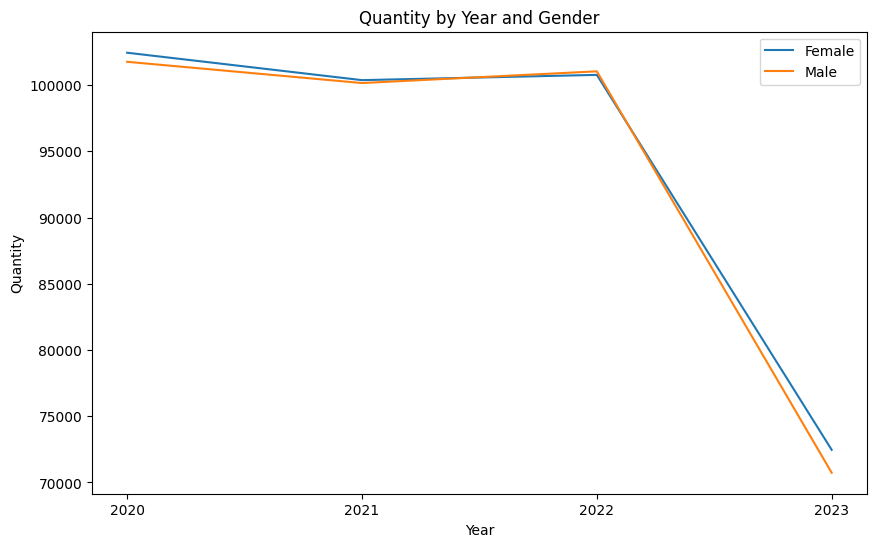

In [41]:
# Convertendo 'Year' para int
df_quantity_by_year_gender['Year'] = df_quantity_by_year_gender['Year'].astype(int)

# Ordenando o DataFrame por 'Year'
df_quantity_by_year_gender = df_quantity_by_year_gender.sort_values('Year')

# Criando um gráfico de linhas
plt.figure(figsize=(10,6))
for gender in df_quantity_by_year_gender['Gender'].unique():
    subset_gender = df_quantity_by_year_gender[df_quantity_by_year_gender['Gender'] == gender]
    plt.plot(subset_gender['Year'], subset_gender['Quantity'], label=gender)

# Adicionando títulos e rótulos
plt.title('Quantity by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Definindo os rótulos do eixo x para serem os valores únicos de 'Year'
plt.xticks(df_quantity_by_year_gender['Year'].unique())

# Coletando as linhas e rótulos do gráfico
lines, labels = plt.gca().get_legend_handles_labels()

# Ordenando os rótulos
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[0]))

# Definindo a legenda com os rótulos ordenados
plt.legend(lines, labels)

# Mostrando o gráfico
plt.show()